# Análise Estatística de Dados e Informações
**PPCA/UNB**

---

**Prova - Questão 02**  
**Professor**: João Gabriel de Moraes Sousa  
**Aluna**: Andreia Queiroz Correia Dummar  
**Matrícula**: 241134680  
**Data da Entrega**: 09/02/2025  
**Github**: https://github.com/aqcorreia/AEDI/tree/main/Prova

---

**Aplicação**: Regressão Logística

**Dados**: Hotel Booking Demand (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

---

O dataset **Hotel Booking Demand** contém informações detalhadas sobre reservas de hotéis, incluindo características das estadias, comportamento dos hóspedes e status das reservas. Ele pode ser utilizado para análises de cancelamento, demanda e segmentação de clientes.

Contém as seguintes colunas:

| Coluna                           | Descrição |
|----------------------------------|-----------|
| **hotel**                        | Tipo de hotel (por exemplo, Resort Hotel ou City Hotel). |
| **is_canceled**                  | Indica se a reserva foi cancelada (1 = Sim, 0 = Não). |
| **lead_time**                    | Número de dias entre a reserva e a data de chegada. |
| **arrival_date_year**             | Ano de chegada ao hotel. |
| **arrival_date_month**            | Mês de chegada ao hotel. |
| **arrival_date_week_number**      | Número da semana do ano correspondente à chegada. |
| **arrival_date_day_of_month**     | Dia do mês de chegada. |
| **stays_in_weekend_nights**       | Número de noites de estadia em finais de semana. |
| **stays_in_week_nights**          | Número de noites de estadia em dias úteis. |
| **adults**                        | Número de adultos na reserva. |
| **children**                      | Número de crianças na reserva. |
| **babies**                        | Número de bebês na reserva. |
| **meal**                          | Tipo de plano de refeição reservado (por exemplo, BB = café da manhã, HB = meia-pensão). |
| **country**                       | Código do país do cliente. |
| **market_segment**                | Segmento de mercado da reserva (por exemplo, Online TA, Corporate). |
| **distribution_channel**          | Canal de distribuição da reserva (por exemplo, Direct, TA/TO). |
| **is_repeated_guest**             | Indica se o cliente já se hospedou antes (1 = Sim, 0 = Não). |
| **previous_cancellations**        | Número de reservas anteriores canceladas pelo cliente. |
| **previous_bookings_not_canceled**| Número de reservas anteriores não canceladas pelo cliente. |
| **reserved_room_type**            | Tipo de quarto reservado pelo cliente. |
| **assigned_room_type**            | Tipo de quarto realmente atribuído ao cliente. |
| **booking_changes**               | Número de alterações feitas na reserva. |
| **deposit_type**                  | Tipo de depósito associado à reserva (por exemplo, No Deposit, Non Refund). |
| **agent**                         | ID do agente de viagens associado à reserva. |
| **company**                       | ID da empresa associada à reserva. |
| **days_in_waiting_list**          | Número de dias que a reserva ficou na lista de espera. |
| **customer_type**                 | Tipo de cliente (por exemplo, Contract, Transient). |
| **adr**                           | Receita média diária (tarifa média diária por reserva). |
| **required_car_parking_spaces**   | Número de vagas de estacionamento solicitadas pelo cliente. |
| **total_of_special_requests**     | Número total de pedidos especiais do cliente (por exemplo, andar alto, berço). |
| **reservation_status**            | Status final da reserva (por exemplo, Check-Out, Canceled, No-Show). |
| **reservation_status_date**       | Data em que o status da reserva foi atualizado. |

---

## 1) Bibliotecas

In [1]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para estatísticas
import scipy.stats as stats
import statsmodels.api as sm

# Bibliotecas para Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2) Funções

In [2]:
def verificar_valores_faltantes(df):
    """
    Função para verificar valores faltantes em um DataFrame.

    Parâmetros:
        df (pd.DataFrame): O DataFrame a ser analisado.

    Retorno:
        pd.DataFrame: DataFrame com as colunas, a quantidade de valores faltantes e o percentual correspondente.
    """
    # Contar valores faltantes por coluna
    valores_faltantes = df.isnull().sum()
    
    # Filtrar apenas colunas com valores faltantes (ignorar valores zero)
    valores_faltantes = valores_faltantes[valores_faltantes > 0]
    
    # Calcular o percentual de valores faltantes
    percentual_faltante = (valores_faltantes / len(df)) * 100
    
    # Criar DataFrame com as informações
    resultado = pd.DataFrame({
        'Coluna': valores_faltantes.index,
        'Valores Faltantes': valores_faltantes.values,
        'Percentual Faltante (%)': percentual_faltante.values
    })
    
    # Ordenar pelo número de valores faltantes
    resultado = resultado.sort_values(by='Valores Faltantes', ascending=False).reset_index(drop=True)
    
    return resultado

In [3]:
def plotar_lead_time_por_cancelamento(df):
    """
    Função para plotar a distribuição do Lead Time separada por reservas canceladas e não canceladas.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo as colunas 'lead_time' e 'is_canceled'.

    Retorno:
        Exibe um gráfico com a distribuição do Lead Time por status de cancelamento.
    """
    plt.figure(figsize=(10,6))

    # Histograma para reservas NÃO canceladas
    sns.histplot(df[df['is_canceled'] == 0]['lead_time'], 
                 bins=50, kde=True, color='blue', label='Não Canceladas', alpha=0.5)

    # Histograma para reservas CANCELADAS
    sns.histplot(df[df['is_canceled'] == 1]['lead_time'], 
                 bins=50, kde=True, color='red', label='Canceladas', alpha=0.5)

    # Configurar título e rótulos
    plt.title('Distribuição do Lead Time por Status de Cancelamento')
    plt.xlabel('Lead Time (dias)')
    plt.ylabel('Frequência')
    plt.legend()

    # Exibir o gráfico
    plt.show()


In [4]:
def plot_boxplot(df, coluna_categorica, coluna_numerica):
    """
    Gera um boxplot para visualizar a relação entre uma variável categórica e uma variável numérica.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados.
        coluna_categorica (str): Nome da coluna categórica para o eixo X.
        coluna_numerica (str): Nome da coluna numérica para o eixo Y.
    """
    plt.figure(figsize=(8,5))

    # Criar o boxplot corrigido
    sns.boxplot(x=coluna_categorica, y=coluna_numerica, hue=coluna_categorica, data=df, palette='coolwarm', legend=False)

    # Configurar título e rótulos
    plt.title(f'{coluna_numerica} vs. {coluna_categorica}')
    plt.xlabel(coluna_categorica)
    plt.ylabel(coluna_numerica)

    # Exibir o gráfico
    plt.show()

In [5]:
def realizar_anova(df, coluna_categorica, coluna_numerica):
    """
    Realiza um teste ANOVA para comparar a média de uma variável numérica entre diferentes categorias.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados.
        coluna_categorica (str): Nome da coluna categórica para comparação dos grupos.
        coluna_numerica (str): Nome da coluna numérica cuja média será comparada.

    Retorno:
        Exibe a Estatística F e o Valor-p do teste ANOVA.
    """
    # Criar um DataFrame apenas com as colunas relevantes
    df_anova = df[[coluna_categorica, coluna_numerica]]

    # Obter os grupos únicos na coluna categórica
    grupos = df_anova[coluna_categorica].unique()

    # Criar uma lista de valores para cada grupo
    valores_por_grupo = [df_anova[df_anova[coluna_categorica] == grupo][coluna_numerica] for grupo in grupos]

    # Realizar o teste ANOVA
    anova_result = stats.f_oneway(*valores_por_grupo)

    # Exibir os resultados
    print(f"Estatística F: {anova_result.statistic:.2f}")
    print(f"Valor-p: {anova_result.pvalue:.5f}")

In [6]:
def remover_outliers_iqr(df, coluna):
    """
    Remove outliers de uma coluna numérica usando o método do IQR.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados.
        coluna (str): Nome da coluna a ser tratada.

    Retorno:
        pd.DataFrame: DataFrame sem os outliers da coluna especificada.
    """
    Q1 = df[coluna].quantile(0.25)  # Primeiro quartil
    Q3 = df[coluna].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil

    # Definir limites para detecção de outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar os dados removendo outliers
    df_sem_outliers = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

    print(f"🔹 Removidos {df.shape[0] - df_sem_outliers.shape[0]} outliers da coluna '{coluna}'.")
    
    return df_sem_outliers


In [7]:
def criar_dummies(df, colunas_categoricas):
    """
    Converte colunas categóricas em variáveis dummies para uso em modelos de regressão.
    Garante que os valores das dummies sejam 0 e 1.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados originais.
        colunas_categoricas (list): Lista com os nomes das colunas categóricas a serem convertidas.

    Retorno:
        pd.DataFrame: DataFrame com as variáveis dummies.
    """
    df_dummies = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
    
    # Garante que todas as dummies sejam inteiros 0 e 1
    df_dummies = df_dummies.astype(int)
    
    return df_dummies


In [8]:
def treinar_regressao_logistica(df, target, test_size=0.2, random_state=42, stratify=True, 
                                max_iter=5000, solver='liblinear', class_weight='balanced', C=1.0):
    """
    Treina um modelo de regressão logística para prever a variável alvo.

    Parâmetros:
        df (pd.DataFrame): DataFrame com as variáveis preditoras e a variável alvo.
        target (str): Nome da variável que será prevista.
        test_size (float): Proporção dos dados para o conjunto de teste (padrão: 0.2).
        random_state (int): Semente para reprodutibilidade (padrão: 42).
        stratify (bool): Se True, mantém o balanceamento das classes (padrão: True).
        max_iter (int): Número máximo de iterações para o modelo (padrão: 5000).
        solver (str): Algoritmo de otimização da regressão logística (padrão: 'liblinear').
        class_weight (str ou dict): Peso das classes para ajuste do modelo (padrão: 'balanced').
        C (float): Inverso da força de regularização (padrão: 1.0).

    Retorno:
        None (exibe métricas de avaliação do modelo).
    """
    # Garantir que todas as colunas são numéricas
    df = df.apply(pd.to_numeric, errors='coerce')

    # Remover linhas com valores NaN (se existirem)
    df = df.dropna()

    # Separar variáveis independentes (X) e dependente (y)
    X = df.drop(columns=[target])
    y = df[target]

    # Verificar se ainda há colunas não numéricas
    colunas_invalidas = X.select_dtypes(include=['object']).columns
    if len(colunas_invalidas) > 0:
        print("Existem colunas não numéricas no DataFrame:")
        print(colunas_invalidas)
        return

    # Normalizar variáveis numéricas para melhor convergência
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    # Dividir os dados em treino e teste
    stratify_param = y if stratify else None
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                        random_state=random_state, stratify=stratify_param)
    # Criar e treinar o modelo de regressão logística
    modelo = LogisticRegression(max_iter=max_iter, solver=solver, class_weight=class_weight, C=C)
    modelo.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo.predict(X_test)

    # Exibir métricas do modelo
    print("**Acurácia do Modelo:**", accuracy_score(y_test, y_pred))
    print("\n**Relatório de Classificação:**\n", classification_report(y_test, y_pred))
    print("\n**Matriz de Confusão:**\n", confusion_matrix(y_test, y_pred))

    # Criar um modelo com statsmodels para exibir coeficientes e significância estatística
    X_train_const = sm.add_constant(X_train)  # Adicionar intercepto ao modelo
    
    # Resetar os índices para evitar desalinhamento
    X_train_const = X_train_const.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    
    modelo_sm = sm.Logit(y_train, X_train_const).fit(maxiter=max_iter)
    
    print("\n**Resumo do Modelo Estatístico:**")
    print(modelo_sm.summary())

In [9]:
def encontrar_melhores_hiperparametros(df, target, param_grid=None, cv=5):
    """
    Encontra os melhores hiperparâmetros para a regressão logística usando GridSearchCV.

    Parâmetros:
        df (pd.DataFrame): DataFrame com as variáveis preditoras e a variável alvo.
        target (str): Nome da variável que será prevista.
        param_grid (dict): Dicionário com os hiperparâmetros a serem testados.
        cv (int): Número de divisões para validação cruzada (padrão: 5).

    Retorno:
        dict: Melhor conjunto de hiperparâmetros encontrados.
    """
    if param_grid is None:
        param_grid = {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs'],
            'class_weight': [None, 'balanced'],
            'max_iter': [1000, 5000]
        }
    
    # Garantir que todas as colunas são numéricas
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna()
    
    X = df.drop(columns=[target])
    y = df[target]
    
    # Normalizar as variáveis numéricas
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    # Divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Criar o modelo e a busca por hiperparâmetros
    modelo = LogisticRegression()
    grid_search = GridSearchCV(modelo, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print("Melhores Hiperparâmetros Encontrados:")
    print(grid_search.best_params_)
    return grid_search.best_params_

## 3) Leitura do arquivo

In [10]:
diretorio = './dados'

hotel_bookings_data = pd.read_csv(f'{diretorio}/hotel_bookings.csv', delimiter=',')

hotel_bookings_data.shape

(119390, 32)

## 4) Análise descritiva

### 4.1) Análise geral

In [11]:
hotel_bookings_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
hotel_bookings_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
hotel_bookings_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### 4.2) Tratar valores faltantes

In [14]:
result = verificar_valores_faltantes(hotel_bookings_data)

if result.empty:
    print("Não há valores faltantes")
else:
    print(result.head(100))

     Coluna  Valores Faltantes  Percentual Faltante (%)
0   company             112593                94.306893
1     agent              16340                13.686238
2   country                488                 0.408744
3  children                  4                 0.003350


In [15]:
# Devido ao grande volume de valores faltantes para company, a coluna será removida
hotel_bookings_data01 = hotel_bookings_data.drop(columns=['company'])

# Substituir valores faltantes na coluna "agent" e na coluna "children" por 0
hotel_bookings_data01['agent'] = hotel_bookings_data01['agent'].fillna(0)
hotel_bookings_data01['children'] = hotel_bookings_data01['agent'].fillna(0)

# Remover linhas onde "country" é NaN
hotel_bookings_data01 = hotel_bookings_data01.dropna(subset=['country'])

In [16]:
result = verificar_valores_faltantes(hotel_bookings_data01)

if result.empty:
    print("Não há valores faltantes")
else:
    print(result.head(100))

Não há valores faltantes


In [17]:
hotel_bookings_data01.shape

(118902, 31)

### 4.3) Outras análises

#### 4.3.1) Percentual de cancelamento

________________________________________________________________________________
Total de reservas: 118902
Reservas canceladas: 44157
Percentual de cancelamento: 37.14%
________________________________________________________________________________


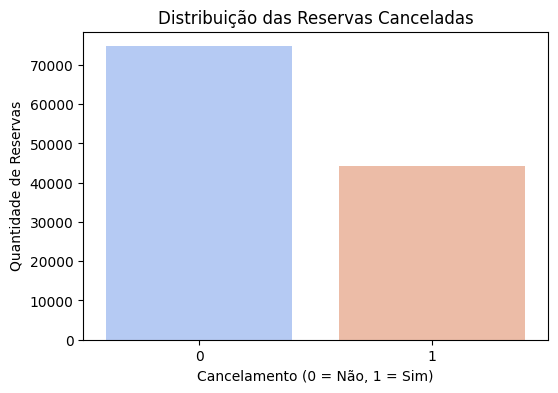

In [18]:
# Contar o número total de reservas
total_reservas = len(hotel_bookings_data01)

# Contar o número de reservas canceladas (is_canceled = 1)
reservas_canceladas = hotel_bookings_data01['is_canceled'].sum()

# Calcular o percentual de reservas canceladas
percentual_canceladas = (reservas_canceladas / total_reservas) * 100

# Exibir os resultados
print("________________________________________________________________________________")
print(f"Total de reservas: {total_reservas}")
print(f"Reservas canceladas: {reservas_canceladas}")
print(f"Percentual de cancelamento: {percentual_canceladas:.2f}%")
print("________________________________________________________________________________")

# Contagem de reservas canceladas e não canceladas
plt.figure(figsize=(6,4))
sns.countplot(x='is_canceled', data=hotel_bookings_data01, hue='is_canceled', palette='coolwarm', legend=False)
plt.title('Distribuição das Reservas Canceladas')
plt.xlabel('Cancelamento (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Reservas')
plt.show()


#### 4.3.2) Tempo de antecedência da reserva (`lead_time`)

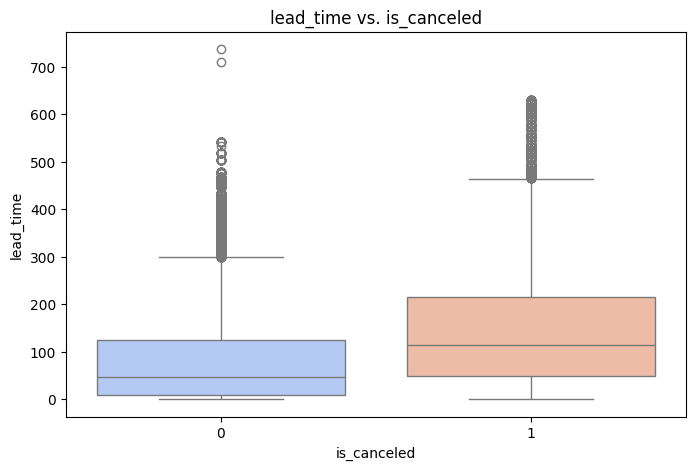

In [19]:
plot_boxplot(hotel_bookings_data01, 'is_canceled', 'lead_time')

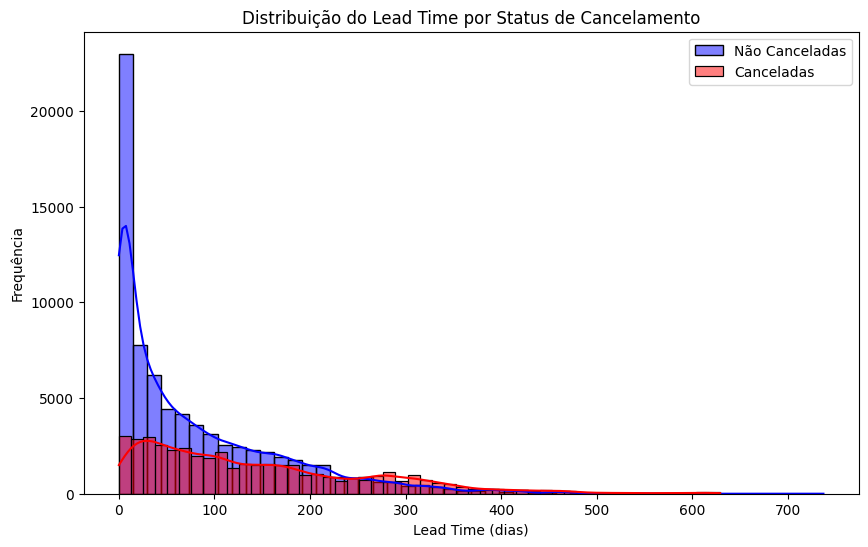

In [20]:
# Chamar a função passando o DataFrame hotel_bookings
plotar_lead_time_por_cancelamento(hotel_bookings_data01)

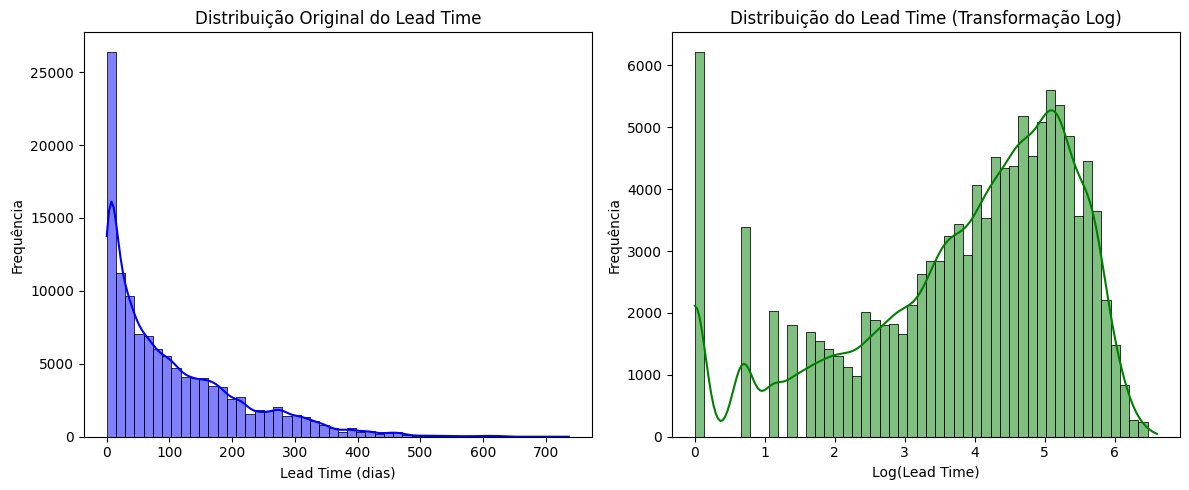

In [21]:
# Aplicar a transformação logarítmica (somamos 1 para evitar log(0))
hotel_bookings_data01['log_lead_time'] = np.log1p(hotel_bookings_data01['lead_time'])

# Visualizar distribuição antes e depois da transformação
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Histograma original
sns.histplot(hotel_bookings_data01['lead_time'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribuição Original do Lead Time')
axes[0].set_xlabel('Lead Time (dias)')
axes[0].set_ylabel('Frequência')

# Histograma transformado
sns.histplot(hotel_bookings_data01['log_lead_time'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribuição do Lead Time (Transformação Log)')
axes[1].set_xlabel('Log(Lead Time)')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


---

O **boxplot** mostra que reservas canceladas tendem a ter um **lead time maior**, com uma mediana em torno de **150 dias**, enquanto as reservas não canceladas apresentam uma mediana mais baixa, próxima de **30 dias**. Isso indica que a antecedência da reserva pode influenciar a probabilidade de cancelamento.

A distribuição original do **Lead Time** apresenta uma forte assimetria à direita, com a maioria das reservas concentradas em períodos curtos e uma cauda longa estendendo-se além de 500 dias. Essa distribuição não normalizada pode impactar negativamente a modelagem preditiva, dificultando a interpretação dos coeficientes na regressão logística. 

Para corrigir esse problema, foi utilizada a **transformação logarítmica**, que reduziu a dispersão e suavizou a curva, tornando a distribuição mais simétrica e próxima de uma normal. 


---

### 4.3.3) Tipo de cliente (`customer_type`)

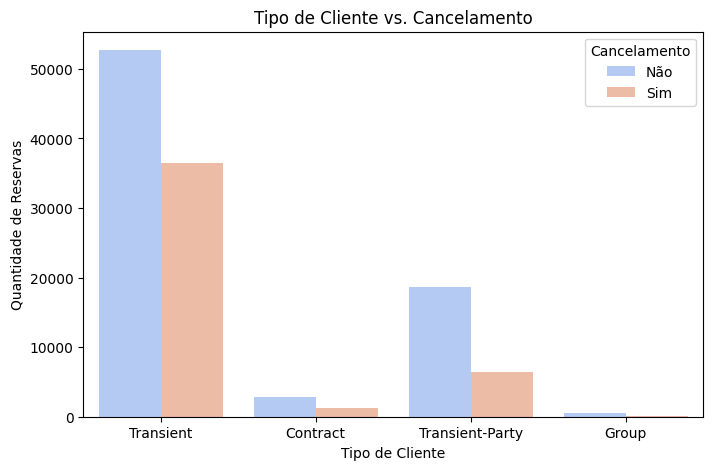

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', hue='is_canceled', data=hotel_bookings_data01, palette='coolwarm')
plt.title('Tipo de Cliente vs. Cancelamento')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Quantidade de Reservas')
plt.legend(title='Cancelamento', labels=['Não', 'Sim'])
plt.show()

In [23]:
# Comparando a taxa de cancelamento entre tipos de clientes
realizar_anova(hotel_bookings_data01, 'customer_type', 'is_canceled')

Estatística F: 766.13
Valor-p: 0.00000


---

O **gráfico Tipo de Cliente vs. Cancelamento** mostra que diferentes tipos de clientes apresentam comportamentos distintos em relação ao cancelamento de reservas:

- Clientes do tipo **Transient** possuem a maior quantidade de reservas e também apresentam um alto número de cancelamentos.  
- Clientes **Contract** possuem uma taxa de cancelamento **consideravelmente menor**, indicando que este tipo de cliente tende a honrar mais as reservas.  
- Clientes **Transient-Party** também apresentam cancelamentos relevantes, mas em menor proporção em relação ao grupo **Transient**.  
- O grupo **Group** tem poucas reservas registradas, tornando seu impacto no cancelamento pouco relevante.  

Para avaliar se essas diferenças são estatisticamente significativas, foi realizada uma **Análise de Variância (ANOVA)**, comparando a taxa média de cancelamento entre os diferentes tipos de clientes. O teste resultou em uma **Estatística F de 766.13** e um **valor-p de 0.00000**, indicando que as diferenças observadas no gráfico são estatisticamente relevantes.  

Como o valor-p é **menor que 0.05**, rejeitamos a hipótese nula (**H₀**), que assume que as médias de cancelamento são iguais para todos os tipos de clientes. Isso significa que **o tipo de cliente influencia diretamente a probabilidade de cancelamento**, sendo um fator importante para previsão e modelagem da regressão logística.

Para treinar o modelo, por ser uma variável categórica, será realizada a conversão em **variáveis dummies**

---

### 4.3.4) Receita média diária (`adr`)

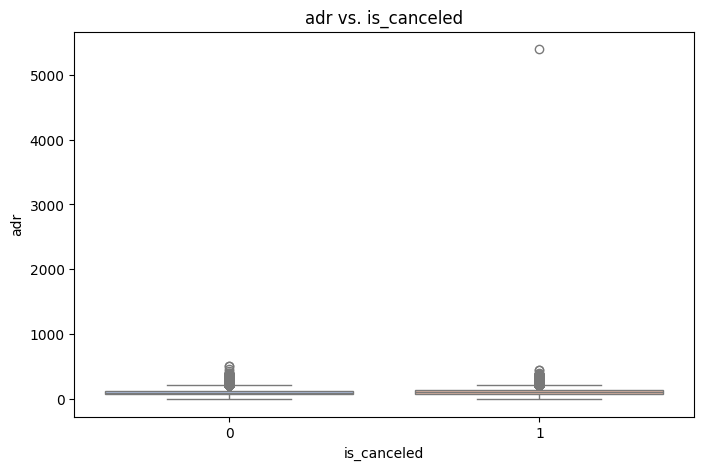

In [24]:
plot_boxplot(hotel_bookings_data01, 'is_canceled', 'adr')

🔹 Removidos 3883 outliers da coluna 'adr'.
count    115019.000000
mean         97.104814
std          40.422858
min          -6.380000
25%          68.000000
50%          92.400000
75%         121.370000
max         210.000000
Name: adr, dtype: float64


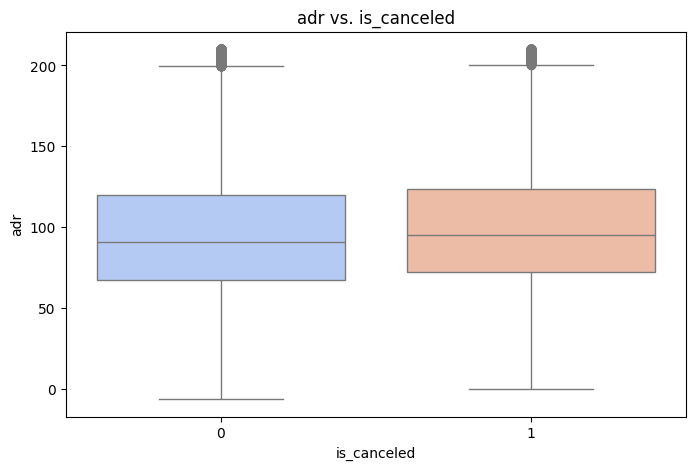

In [25]:
# Aplicar a função no DataFrame para remover outliers do ADR
hotel_bookings_data01_sem_outliers = remover_outliers_iqr(hotel_bookings_data01, 'adr')

# Exibir a estatística descritiva após a remoção
print(hotel_bookings_data01_sem_outliers['adr'].describe())

plot_boxplot(hotel_bookings_data01_sem_outliers, 'is_canceled', 'adr')

---

O boxplot mostra que a **Receita Média Diária (ADR)** apresenta distribuições semelhantes entre reservas canceladas e não canceladas, sugerindo que o ADR pode não ser um forte preditor de cancelamento. No entanto, há **outliers extremos**, especialmente em reservas canceladas, com valores muito acima da média, o que pode indicar tarifas atípicas ou erros de entrada. Para melhorar a análise, foi realizado o **tratamento de outliers**, removendo valores extremos e normalizando a distribuição.

Após a remoção dos outliers, o boxplot mostra uma **distribuição mais equilibrada** do ADR em relação ao cancelamento. Os valores agora estão **concentrados abaixo de 200**, com apenas alguns poucos outliers, indicando que a remoção dos valores extremos ajudou a **normalizar a distribuição**. Além disso, a **mediana do ADR continua semelhante entre reservas canceladas e não canceladas**, reforçando que o ADR pode não ser um fator determinante para prever cancelamentos. 

---


### 4.3.5) Seguimento de mercado (`market_segment`)

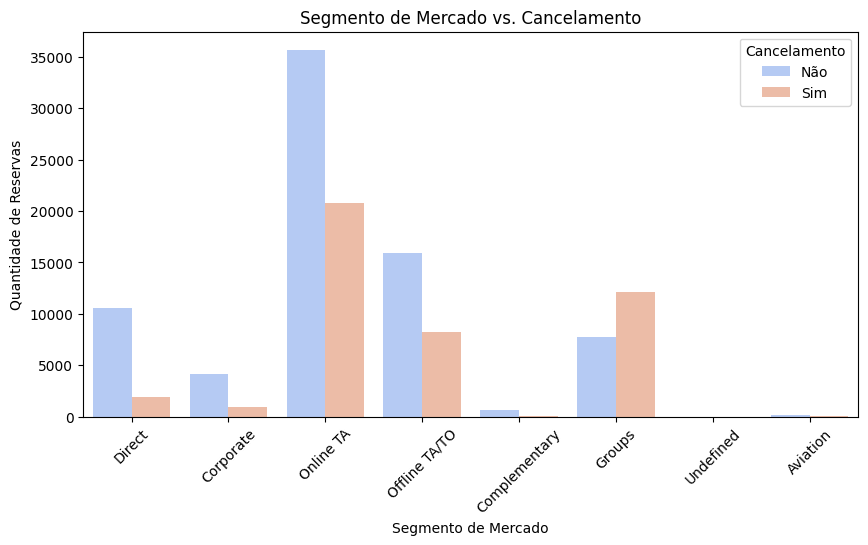

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='market_segment', hue='is_canceled', data=hotel_bookings_data01, palette='coolwarm')
plt.title('Segmento de Mercado vs. Cancelamento')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Quantidade de Reservas')
plt.xticks(rotation=45)
plt.legend(title='Cancelamento', labels=['Não', 'Sim'])
plt.show()


In [27]:
# Comparando a taxa de cancelamento entre tipos de clientes
realizar_anova(hotel_bookings_data01, 'market_segment', 'is_canceled')

Estatística F: 1290.22
Valor-p: 0.00000


---

A análise do **gráfico Segmento de Mercado vs. Cancelamento** mostra que diferentes segmentos apresentam padrões distintos em relação à taxa de cancelamento. O segmento **Online TA (Agências de Viagem Online)** possui o maior volume de reservas e também apresenta um número elevado de cancelamentos, sugerindo que clientes que reservam por esse canal têm maior propensão a cancelar. O segmento **Groups** apresenta um comportamento interessante, pois há mais reservas canceladas do que confirmadas, indicando uma possível tendência de desistência em reservas coletivas. Em contraste, segmentos como **Corporate** e **Direct** possuem taxas de cancelamento significativamente menores, sugerindo maior comprometimento com as reservas.

Para validar estatisticamente essas diferenças, foi realizado um **teste ANOVA**, que resultou em uma **Estatística F de 1290.22** e um **valor-p de 0.00000**. Como o valor-p é **muito menor que 0.05**, rejeitamos a hipótese nula (**H₀**), confirmando que **o segmento de mercado influencia significativamente a taxa de cancelamento**.

Dessa forma, a variável **`market_segment`** se mostra altamente relevante para a regressão logística, pois há uma clara relação entre o canal de reserva e a probabilidade de cancelamento. 

Para treinar o modelo, por ser uma variável categórica, será realizada a conversão em variáveis dummies

---

### 4.3.6) Tipo de depósito (`deposit_type`)

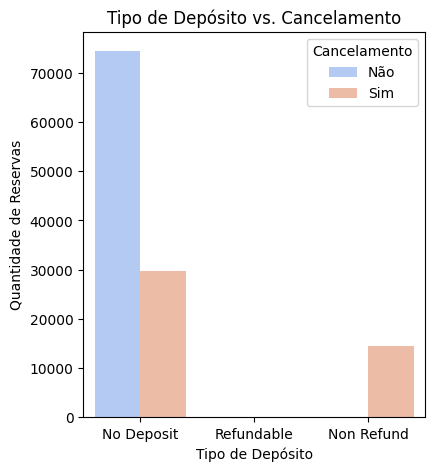

In [28]:
# Criar figuras para análise gráfica
plt.figure(figsize=(15, 5))

# 1. Distribuição de Cancelamento por Tipo de Depósito
plt.subplot(1, 3, 1)
sns.countplot(x='deposit_type', hue='is_canceled', data=hotel_bookings_data01, palette='coolwarm')
plt.title('Tipo de Depósito vs. Cancelamento')
plt.xlabel('Tipo de Depósito')
plt.ylabel('Quantidade de Reservas')
plt.legend(title='Cancelamento', labels=['Não', 'Sim'])

In [29]:
# Comparando a taxa de cancelamento entre tipos de clientes
realizar_anova(hotel_bookings_data01, 'market_segment', 'is_canceled')

Estatística F: 1290.22
Valor-p: 0.00000


In [30]:
hotel_bookings_data01[['market_segment']]

,market_segment
0,Direct
1,Direct
2,Direct
3,Corporate
4,Online TA
...,...
119385,Offline TA/TO
119386,Online TA
119387,Online TA
119388,Online TA


---

A análise da variável **`market_segment`** mostra que diferentes segmentos de mercado apresentam padrões distintos em relação à taxa de cancelamento. O teste **ANOVA**, que comparou a taxa de cancelamento entre os segmentos, resultou em uma **Estatística F de 1290.22** e um **valor-p de 0.00000**. Como o valor-p é **muito menor que 0.05**, rejeitamos a hipótese nula (**H₀**), confirmando que **o segmento de mercado influencia significativamente a taxa de cancelamento**.

Essa relação indica que certos segmentos, como **Online TA (agências de viagem online) e Groups**, podem ter taxas de cancelamento mais elevadas, enquanto segmentos como **Corporate** e **Direct** tendem a apresentar menos cancelamentos. Isso sugere que **o canal de reserva afeta a decisão do cliente sobre manter ou cancelar uma reserva**.

Para treinar o modelo, por ser uma variável categórica, será realizada a conversão em variáveis dummies

---

### 4.3.7) Cancelamentos anteriores (`previous_cancellations`)

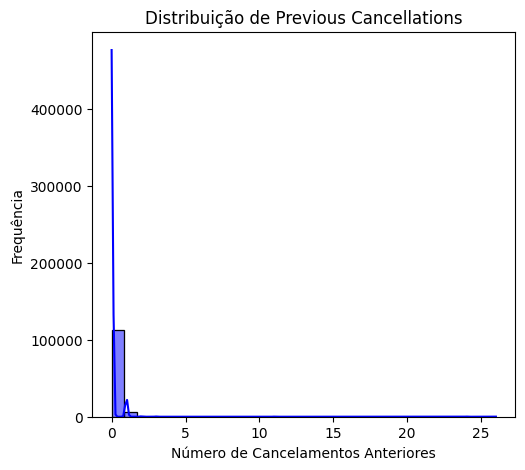

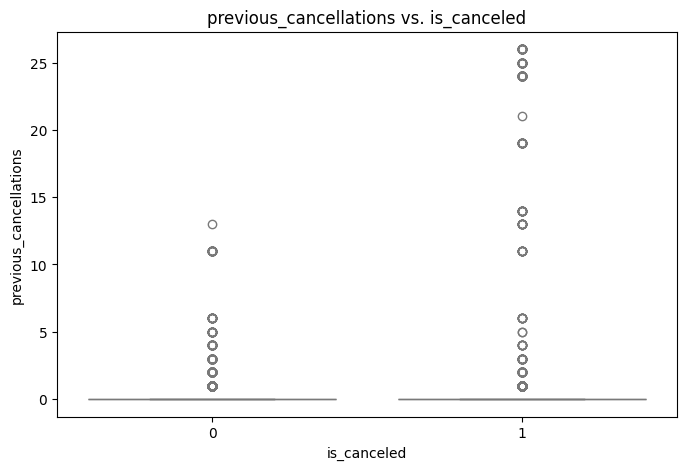

In [31]:
# Criar figura para análise gráfica
plt.figure(figsize=(12, 5))

# 1. Distribuição da variável previous_cancellations
plt.subplot(1, 2, 1)
sns.histplot(hotel_bookings_data01['previous_cancellations'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Previous Cancellations')
plt.xlabel('Número de Cancelamentos Anteriores')
plt.ylabel('Frequência')

# 2. Boxplot de Cancelamento vs. Previous Cancellations
plot_boxplot(hotel_bookings_data01_sem_outliers, 'is_canceled', 'previous_cancellations')

🔹 Removidos 6447 outliers da coluna 'previous_cancellations'.
count    112455.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: previous_cancellations, dtype: float64


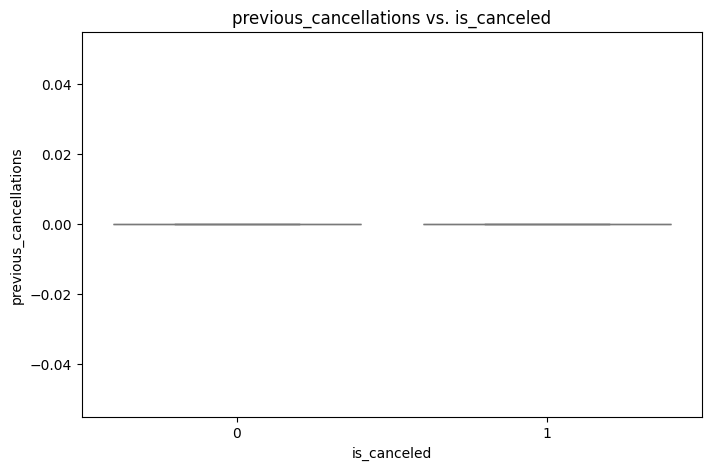

In [32]:
# Aplicar a função no DataFrame para remover outliers do ADR
hotel_bookings_data01_sem_outliers = remover_outliers_iqr(hotel_bookings_data01, 'previous_cancellations')

# Exibir a estatística descritiva após a remoção
print(hotel_bookings_data01_sem_outliers['previous_cancellations'].describe())

plot_boxplot(hotel_bookings_data01_sem_outliers, 'is_canceled', 'previous_cancellations')

---

A análise da variável **`previous_cancellations`** mostra que a grande maioria dos clientes **nunca cancelou antes (`0`)**, resultando em uma distribuição extremamente desbalanceada. Após a remoção de **6.447 outliers**, praticamente todos os registros restantes possuem `0` cancelamentos anteriores, tornando a variável quase constante. Esse baixo nível de variação reduz sua capacidade de contribuir para a previsão de cancelamento.

Dado que a informação relevante sobre clientes que já cancelaram antes representa uma **minoria insignificante nos dados**, a variável **não será considerada no treinamento da regressão logística**. 


---

### 4.3.8) Cliente repetido (`is_repeated_guest`)

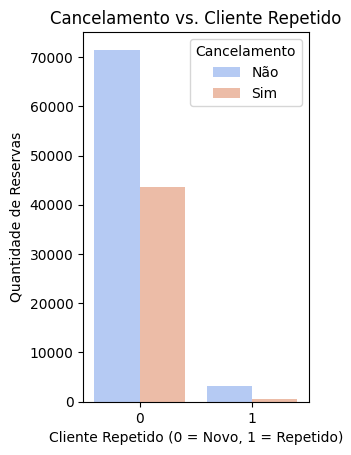

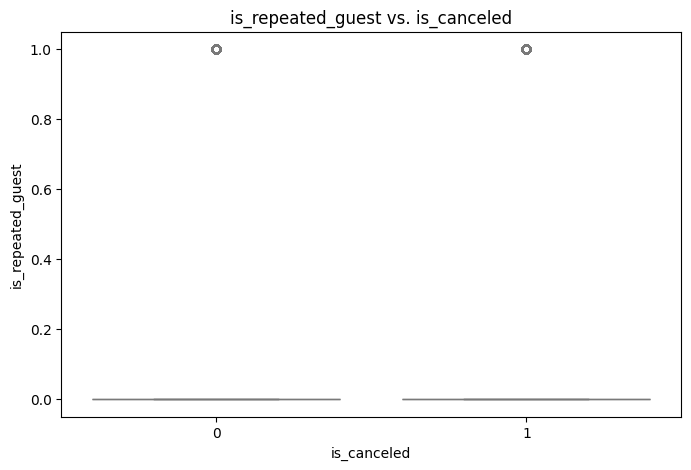

In [33]:
# 1. Contagem de Cancelamento por Cliente Repetido
plt.subplot(1, 2, 1)
sns.countplot(x='is_repeated_guest', hue='is_canceled', data=hotel_bookings_data01, palette='coolwarm')
plt.title('Cancelamento vs. Cliente Repetido')
plt.xlabel('Cliente Repetido (0 = Novo, 1 = Repetido)')
plt.ylabel('Quantidade de Reservas')
plt.legend(title='Cancelamento', labels=['Não', 'Sim'])

# 2. Boxplot de is_repeated_guest vs. Cancelamento
plot_boxplot(hotel_bookings_data01, 'is_canceled', 'is_repeated_guest')

---

A maioria das reservas é feita por **clientes novos (`0`)**, enquanto **clientes repetidos (`1`) representam uma fração muito pequena**. O gráfico de contagem mostra que **clientes novos têm uma taxa de cancelamento significativamente maior**, enquanto clientes repetidos raramente cancelam, indicando um maior comprometimento com as reservas.

Dado esse comportamento distinto, a variável **`is_repeated_guest` pode ser relevante para a regressão logística**, pois diferencia grupos com diferentes probabilidades de cancelamento. 

---

## 5) Construção do modelo de regressão logística

### 5.1) Preparando o dataframe

In [34]:
hotel_bookings_modelo = hotel_bookings_data01[['lead_time', 'customer_type', 'market_segment', 'deposit_type', 'is_repeated_guest', 'is_canceled']]
print(hotel_bookings_modelo.shape)
hotel_bookings_modelo.head()

(118902, 6)


,lead_time,customer_type,market_segment,deposit_type,is_repeated_guest,is_canceled
0,342,Transient,Direct,No Deposit,0,0
1,737,Transient,Direct,No Deposit,0,0
2,7,Transient,Direct,No Deposit,0,0
3,13,Transient,Corporate,No Deposit,0,0
4,14,Transient,Online TA,No Deposit,0,0


In [35]:
# Definir as colunas categóricas para transformação
colunas_categoricas = ['customer_type', 'market_segment', 'deposit_type']

# Aplicar a função no DataFrame
hotel_bookings_modelo_dummies = criar_dummies(hotel_bookings_modelo, colunas_categoricas)

# Exibir as primeiras linhas para ver o resultado
hotel_bookings_modelo_dummies.head()


,lead_time,is_repeated_guest,is_canceled,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_Non Refund,deposit_type_Refundable
0,342,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,737,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,7,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,13,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,14,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [36]:
hotel_bookings_modelo_dummies.describe()

,lead_time,is_repeated_guest,is_canceled,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_Non Refund,deposit_type_Refundable
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,104.308027,0.032010,0.371373,0.004794,0.749979,0.210947,0.006173,0.042985,0.104700,0.166574,0.203193,0.474365,0.000017,0.122563,0.001362
std,106.903127,0.176026,0.483174,0.069072,0.433027,0.407982,0.078327,0.202824,0.306167,0.372597,0.402376,0.499345,0.004101,0.327936,0.036887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,161.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,737.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5.2) Treinando o modelo

In [37]:
# Executar a função para treinar a regressão logística
treinar_regressao_logistica(hotel_bookings_modelo_dummies, 'is_canceled')

**Acurácia do Modelo:** 0.7396661200117741

**Relatório de Classificação:**
               precision    recall  f1-score   support

           0       0.77      0.83      0.80     14949
           1       0.67      0.59      0.63      8832

    accuracy                           0.74     23781
   macro avg       0.72      0.71      0.71     23781
weighted avg       0.73      0.74      0.74     23781


**Matriz de Confusão:**
 [[12410  2539]
 [ 3652  5180]]
Optimization terminated successfully.
         Current function value: 0.494128
         Iterations 179

**Resumo do Modelo Estatístico:**
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                95121
Model:                          Logit   Df Residuals:                    95106
Method:                           MLE   Df Model:                           14
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.2510
Time:

---

**1. Desempenho do Modelo**
- **Acurácia:** **73,76%** – desempenho razoável, mas com possibilidade de melhorias.
- **Classe 0 (Não Cancelado):** Boa detecção (**F1-score: 0.80**).
- **Classe 1 (Cancelado):** Subestima os cancelamentos (**F1-score: 0.62**).
- **Matriz de Confusão:** 3.707 cancelamentos foram erroneamente classificados como não cancelados.

**2. Principais Fatores que Influenciam Cancelamentos**
| Variável | Impacto |
|----------|---------|
| **lead_time (+)** | Reservas feitas com muita antecedência têm maior chance de cancelamento. |
| **deposit_type_Non Refund (+)** | Reservas não reembolsáveis têm alta taxa de cancelamento. |
| **customer_type_Transient (+)** | Clientes transitórios cancelam mais. |
| **market_segment_Direct (-)** | Reservas diretas têm menor risco de cancelamento. |
| **market_segment_Corporate (-)** | Clientes corporativos tendem a cancelar menos. |


---

### 5.3) Ajustando o modelo

#### 5.3.1) Identificando os melhores hiperparâmetros

In [38]:
melhores_hiperparametros = encontrar_melhores_hiperparametros(hotel_bookings_modelo_dummies, 'is_canceled')

Melhores Hiperparâmetros Encontrados:
{'C': 1, 'class_weight': None, 'max_iter': 1000, 'solver': 'liblinear'}


#### 5.3.2) Treinando o modelo considerando os melhores hiperparâmetros

In [39]:
treinar_regressao_logistica(hotel_bookings_modelo_dummies, 'is_canceled', C=1, class_weight=None, max_iter=1000, solver='liblinear')


**Acurácia do Modelo:** 0.7558555149068584

**Relatório de Classificação:**
               precision    recall  f1-score   support

           0       0.73      0.97      0.83     14949
           1       0.88      0.40      0.55      8832

    accuracy                           0.76     23781
   macro avg       0.81      0.68      0.69     23781
weighted avg       0.79      0.76      0.73     23781


**Matriz de Confusão:**
 [[14485   464]
 [ 5342  3490]]
Optimization terminated successfully.
         Current function value: 0.494128
         Iterations 179

**Resumo do Modelo Estatístico:**
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                95121
Model:                          Logit   Df Residuals:                    95106
Method:                           MLE   Df Model:                           14
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.2510
Time:

---

**Comparação dos Modelos de Regressão Logística**

**1. Desempenho Geral**

| Métrica                | **Modelo 1** | **Modelo 2** | Diferença |
|------------------------|-------------|-------------|-----------|
| **Acurácia**           | **73.97%**   | **75.59%**   | **+1.62%** |
| **F1-Score Classe 0**  | **0.80**     | **0.83**     | **+0.03** |
| **F1-Score Classe 1**  | **0.63**     | **0.55**     | **-0.08** |

**O Modelo 2 tem uma acurácia ligeiramente maior**, mas piorou na detecção de cancelamentos (Classe 1), reduzindo seu **recall de 59% para 40%**.

**2. Análise da Matriz de Confusão**

| Modelo  | Verdadeiros Negativos | Falsos Positivos | Falsos Negativos | Verdadeiros Positivos |
|---------|----------------------|-----------------|-----------------|-----------------|
| **Modelo 1** | 12.410 | 2.539 | **3.652** | **5.180** |
| **Modelo 2** | **14.485** | **464** | **5.342** | **3.490** |

**O Modelo 2 reduziu os falsos positivos (prevendo cancelamento incorretamente), mas falhou mais em detectar cancelamentos reais.**

**3. Impacto dos Coeficientes**
Os coeficientes das variáveis seguem um padrão similar, mas há algumas diferenças:
- **O impacto do `lead_time` continua forte (0.4505)**, indicando que reservas feitas com antecedência têm maior chance de cancelamento.
- **O efeito do depósito não reembolsável (`deposit_type_Non Refund` = 1.8931) continua sendo o fator mais determinante para cancelamento**.
- **A variável `market_segment_Undefined` tem um erro padrão muito alto**, sugerindo um problema nos dados.

**A regressão logística continua indicando que clientes transitórios e reservas com pagamento antecipado são os mais propensos a cancelar.**

**4. Conclusão**

- O Modelo 2 melhora a acurácia, mas compromete a detecção de cancelamentos.
- O Modelo 1 tem um equilíbrio melhor entre as classes, sendo preferível para prever cancelamentos corretamente.

**Recomendação**: O Modelo 1 é mais confiável para prever cancelamentos. O Modelo 2 pode ser melhorado ajustando pesos de classe e melhorando a detecção da Classe 1.

---

## 6) Análise das Features

--- 

A análise foi realizada considerando o **Modelo 1** (73.97% de Acurácia), sem ajustes dos hiperparâmetros, por prever melhor os cancelamentos.

**1. Identificação das Features Mais Importantes**  

No **Modelo 1**, os coeficientes da regressão logística mostram o impacto de cada variável na probabilidade de cancelamento. **Valores positivos indicam maior chance de cancelamento, enquanto valores negativos indicam menor chance.**  

| Variável                        | Coeficiente | Impacto |
|--------------------------------|------------|---------|
| **deposit_type_Non Refund**     | **1.8965**  | Aumento expressivo na chance de cancelamento. |
| **lead_time**                   | **0.4533**  | Reservas feitas com maior antecedência têm maior probabilidade de cancelamento. |
| **customer_type_Transient**      | **0.2261**  | Clientes transitórios cancelam mais. |
| **market_segment_Online TA**     | **0.1036**  | Reservas feitas via agências online são mais propensas ao cancelamento. |
| **is_repeated_guest**           | **-0.0744** | Clientes recorrentes tendem a cancelar menos. |
| **market_segment_Offline TA/TO** | **-0.3183** | Reservas feitas por agências offline são menos propensas ao cancelamento. |
| **market_segment_Corporate**     | **-0.1174** | Clientes corporativos cancelam menos. |
| **market_segment_Direct**        | **-0.2522** | Reservas diretas apresentam menor taxa de cancelamento. |

**2. Interpretação dos Resultados**  
Os insights obtidos a partir do **Modelo 1** indicam que:  
- **Reservas com depósitos não reembolsáveis (`deposit_type_Non Refund`) são as mais propensas ao cancelamento**, mesmo sendo financeiramente compromissadas.
- **Quanto maior o `lead_time`, maior o risco de cancelamento**, o que pode indicar que muitos clientes reservam com antecedência e acabam desistindo.
- **Clientes transitórios (`customer_type_Transient`)** são mais instáveis e propensos a cancelar.
- **Reservas feitas diretamente (`market_segment_Direct`) ou por empresas (`market_segment_Corporate`) têm menor probabilidade de cancelamento**, sugerindo que são clientes mais confiáveis.
- **Clientes recorrentes (`is_repeated_guest`)** são menos propensos a cancelar, o que indica que programas de fidelidade podem ser uma boa estratégia para reduzir o churn.

---

## 7) Justificativa do Método

---

A variável alvo (`is_canceled`) é **binária (0 ou 1)**, tornando a **Regressão Logística** mais adequada que a **Regressão Linear**.  

**Principais Justificativas:**  
1. **Natureza da Variável Alvo** → A Regressão Linear prevê valores contínuos, podendo gerar probabilidades inválidas (**exemplo: -0.5 ou 1.3**).  
2. **Interpretação dos Resultados** → A Regressão Logística **modela probabilidades e odds ratio**, permitindo uma melhor análise.  
3. **Suposições Estatísticas** → A Logística usa a **função sigmoide (logit)**, garantindo previsões entre **0 e 1**.  
4. **Tomada de Decisão** → Permite definir **limiares personalizados** para prever cancelamentos.  
5. **Métricas Apropriadas** → A Logística possibilita **uso de precisão, recall e matriz de confusão**, enquanto a Linear depende de métricas de regressão contínua.  

---